In [2]:
import os
import sys
sys.path.insert(0, os.getcwd())
import pandas as pd
import argparse
import time
from utils.data_frame_parser import DataFrameParser
from utils.numpytupledataset import NumpyTupleDataset
from utils.smile_to_graph import GGNNPreprocessor

In [3]:
# load data from the beginning
# we have csv files for QM9 and ZINC250k

# test qm9
max_atoms = 9
path = 'data/qm9.csv'
smiles_col = 'SMILES1'
label_idx = 2

preprocessor = GGNNPreprocessor(out_size=max_atoms, kekulize=True)
df = pd.read_csv(path, index_col=0)

In [8]:
labels = df.keys().tolist()[label_idx:]
labels

['A',
 'B',
 'C',
 'mu',
 'alpha',
 'homo',
 'lumo',
 'gap',
 'r2',
 'zpve',
 'U0',
 'U',
 'H',
 'G',
 'Cv']

In [10]:
parser = DataFrameParser(preprocessor, labels = labels, smiles_col = smiles_col)
result = parser.parse(df, return_smiles=True)
#print(parser.extract_total_num(df))

100%|██████████| 133885/133885 [00:29<00:00, 4603.32it/s]


In [12]:
dataset = result['dataset']

In [18]:
dataset[500]

(array([7, 6, 8, 6, 6, 8, 0, 0, 0], dtype=int32),
 array([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
        [[0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
        [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0.],
    

In [24]:
smiles = result['smiles']
smiles[500]

'N=COCC=O'

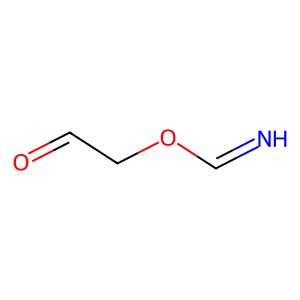

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert SMILES string to molecule
mol = Chem.MolFromSmiles('N=COCC=O')

# Draw molecule
Draw.MolToImage(mol, size=(300, 300))


In [26]:
# suppose we have the kekulized SMILES dataset
import json
with open('data/valid_idx_qm9.json', 'r') as f:
    test_idx = json.load(f)

test_idx = test_idx['valid_idxs']
test_idx = [int(i) for i in test_idx]
col = ['SMILES1']

smiles = pd.read_csv(f'data/qm9.csv')[col]


In [28]:
print(smiles)

                    SMILES1
0                         C
1                         N
2                         O
3                       C#C
4                       C#N
...                     ...
133880  C1C2C3C4C5OC14C5N23
133881  C1N2C3C2C2C4OC12C34
133882  C1N2C3C4C5C2C13CN45
133883  C1N2C3C4C5CC13C2C45
133884  C1N2C3C4C5OC13C2C45

[133885 rows x 1 columns]
